In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain # Pradeep Elance https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python
from scipy.linalg import norm as norm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   

   Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
0              1           Gd              6        Typ           0   
1              1           Gd              8        Typ           1   
2              1           Gd              5        Typ           0   

  Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
0          NaN      Attchd         1976.0           RFn          2.0   
1           TA      Attchd         1997.0           RFn          2.0   
2          NaN      Detchd         1953.0           Unf          1.0   

   Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
0        475.0          TA          TA           Y             0   
1        559.0          TA          TA           Y             0   
2        246.0          TA          TA           Y             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  \
0             44               0           0             0          0     NaN   
1             74               0           0             0          0     NaN   
2             52               0           0             0          0     NaN   

  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
0   NaN          Na

In [4]:
houses_train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


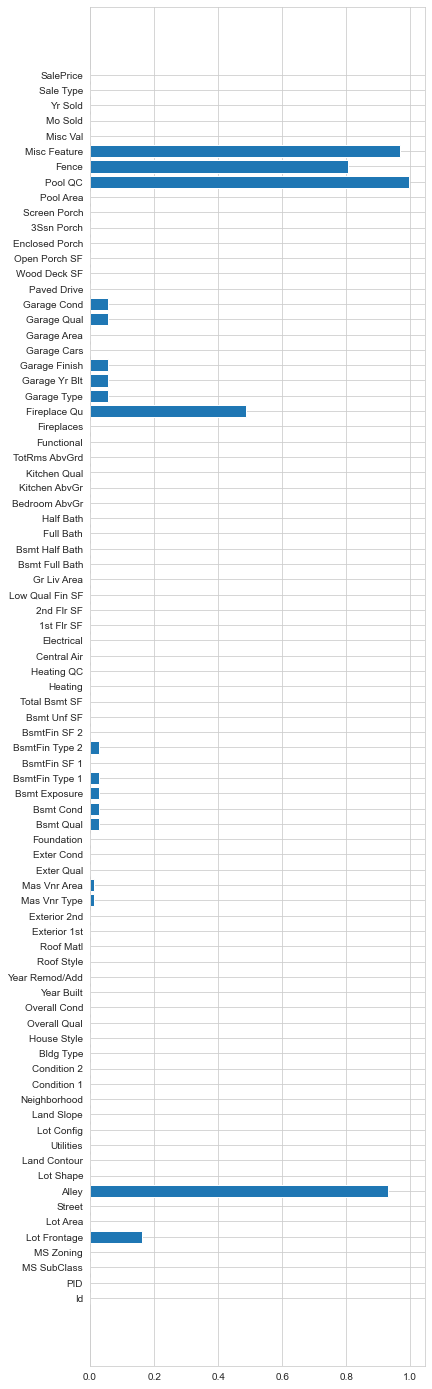

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 25))
plt.barh(houses_train.columns, houses_train.isna().mean());

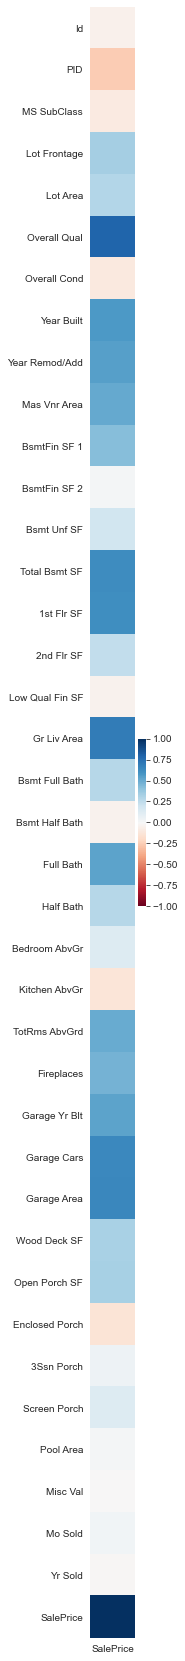

In [6]:
plt.figure(figsize=(1, 30))
sns.heatmap(houses_train.corr()[['SalePrice']], vmin=-1, vmax=1, cmap='RdBu')

In [7]:
mean_corr = houses_train.corr()['SalePrice'].mean()

In [8]:
mean_corr

0.28161237508251313

In [9]:
corr_greater_3_std = houses_train.corr()['SalePrice'] > mean_corr * 2

In [10]:
corr_minus_2_std = houses_train.corr()['SalePrice'] < 0

In [11]:
corr_minus_2_std.sum()

10

In [12]:
# EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
houses_train[corr_minus_2_std.index[corr_minus_2_std | corr_greater_3_std]] 

Id        PID  MS SubClass  Overall Qual  Overall Cond  Year Built  \
0      109  533352170           60             6             8        1976   
1      544  531379050           60             7             5        1996   
2      153  535304180           20             5             7        1953   
3      318  916386060           60             5             5        2006   
4      255  906425045           50             6             8        1900   
...    ...        ...          ...           ...           ...         ...   
2046  1587  921126030           20             8             5        2007   
2047   785  905377130           30             4             5        1940   
2048   916  909253010           50             6             6        1928   
2049   639  535179160           20             4             5        1956   
2050    10  527162130           60             7             5        1999   

      Total Bsmt SF  1st Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Half Bath  \
0             725.0         725                0         1479             0.0   
1             913.0         913                0         2122             0.0   
2            1057.0        1057                0         1057             0.0   
3             384.0         744                0         1444             0.0   
4             676.0         831                0         1445             0.0   
...             ...         ...              ...          ...             ...   
2046         1884.0        1728                0         1728             0.0   
2047          861.0         861                0          861             0.0   
2048          896.0        1172                0         1913             0.0   
2049         1200.0        1200                0         1200             0.0   
2050          994.0        1028                0         1804             0.0   

      Kitchen AbvGr  Garage Cars  Garage Area  Enclosed Porch  Misc Val  \
0                 1          2.0        475.0               0         0   
1                 1          2.0        559.0               0         0   
2                 1          1.0        246.0               0         0   
3                 1          2.0        400.0               0         0   
4                 1          2.0        484.0               0         0   
...             ...          ...          ...             ...       ...   
2046              1          2.0        520.0               0         0   
2047              1          2.0        539.0               0         0   
2048              1          2.0        342.0               0         0   
2049              1          1.0        294.0             140         0   
2050              1          2.0        442.0               0         0   

      Yr Sold  SalePrice  
0        2010     130500  
1        2009     220000  
2        2010     109000  
3        2010     174000  
4        2010     138500  
...       ...        ...  
2046     2008     298751  
2047     2009      82500  
2048     2009     177000  
2049     2009     144000  
2050     2010     189000  

[2051 rows x 18 columns]

In [13]:
# quality_map = {'Po': -1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 5}

In [14]:
# def map_quality_to_discrete(data, columns):
#     for column in columns:
#         data[column] = data[column].map(quality_map)

In [15]:
# quality_cols_to_map = ['Kitchen Qual', 'Exter Qual']

In [16]:
# map_quality_to_discrete(houses_train, quality_cols_to_map)

In [17]:
def category_to_bool_cols(dataframe, list_of_columns):
    for column in list_of_columns:
        dummy_split = pd.get_dummies(dataframe[column], column, drop_first = True) # Creates dummy columns with the name {column}_{value_in_row} per get_dummies documentation
        for dummy_key in dummy_split: # Iterates through dummy_key in dummy_split
            dataframe[dummy_key] = dummy_split[dummy_key] # adds new columns named {dummy_key} to original dataframe

In [18]:
ordinal_categories = ['Kitchen Qual', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Street', 'Bedroom AbvGr', 'Full Bath', 'Neighborhood', 'Garage Finish', 'Garage Cars', 'Garage Qual',
       'Garage Cond', 'Lot Config', 'BsmtFin Type 1', 'BsmtFin Type 2','Lot Shape']
category_to_bool_cols(houses_train, ordinal_categories)

In [19]:
houses_train['has_2f'] = np.where(houses_train['2nd Flr SF'] > 0, 1, 0)

In [20]:
houses_train['Paved_Drive'] = np.where(houses_train['Paved Drive'] == 'Y', 1, 0)

In [21]:
houses_train['has_central_air'] = np.where(houses_train['Central Air'] == 'Y', 1, 0)

houses_train['Total Bsmt SF'].fillna(0, inplace=True)

houses_train['Bsmt Unf SF'].fillna(0, inplace=True)

houses_train['Garage Area'].fillna(0, inplace=True)

In [22]:
change_0_to_1 = lambda x: 1 if x <= 0 else x

In [23]:
# houses_train['log_total_bsmt_sf'] = np.log(houses_train['Total Bsmt SF']).apply(remove_neg_inf)
# houses_train['log_total_bsmt_sf'].value_counts()

In [24]:
def log_col(data, column):
    temp_df = data[column].apply(change_0_to_1).fillna(1)
    data[f"log_{column.replace(' ', '_').lower()}"] = np.log(temp_df)

In [25]:
log_col(houses_train, 'BsmtFin SF 1')
log_col(houses_train, '1st Flr SF')
log_col(houses_train, 'Lot Area')
log_col(houses_train, '2nd Flr SF')
log_col(houses_train, 'Total Bsmt SF')

In [26]:
def log_hist(data, column):
    plt.hist(data[column].apply(change_0_to_1).fillna(1))

In [85]:
def fl1_under_3000_sf(data, features):
    return data[data['1st Flr SF'] < 3000][features]

In [86]:
houses_train.columns[-90:]

Index(['Bsmt Qual_Gd', 'Bsmt Qual_Po', 'Bsmt Qual_TA', 'Bsmt Cond_Fa',
       'Bsmt Cond_Gd', 'Bsmt Cond_Po', 'Bsmt Cond_TA', 'BsmtFin Type 1_BLQ',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_Rec',
       'BsmtFin Type 1_Unf', 'BsmtFin Type 2_BLQ', 'BsmtFin Type 2_GLQ',
       'BsmtFin Type 2_LwQ', 'BsmtFin Type 2_Rec', 'BsmtFin Type 2_Unf',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'Street_Pave', 'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
       'Bedroom AbvGr_4', 'Bedroom AbvGr_5', 'Bedroom AbvGr_6',
       'Bedroom AbvGr_8', 'Full Bath_1', 'Full Bath_2', 'Full Bath_3',
       'Full Bath_4', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood

In [87]:
driveway = ['Paved_Drive']        

In [88]:
overall = ['Overall Cond', 'Overall Qual']

In [89]:
sq_ft = ['Total Bsmt SF', '2nd Flr SF', 'Gr Liv Area', 'Low Qual Fin SF', 'Bsmt Unf SF']

In [90]:
logs = ['log_lot_area', 'log_1st_flr_sf', 'log_2nd_flr_sf', 'log_bsmtfin_sf_1', 'log_total_bsmt_sf']

In [91]:
hvac = ['Heating_GasW', 'Heating_Grav', 'has_central_air']

In [92]:
kitchen = ['Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA']

In [93]:
basement = ['BsmtFin Type 1_BLQ','Bsmt Cond_Gd', 'Bsmt Cond_TA', 'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_Rec',
       'BsmtFin Type 1_Unf', 'BsmtFin Type 2_BLQ', 'BsmtFin Type 2_GLQ',
       'BsmtFin Type 2_LwQ', 'BsmtFin Type 2_Rec', 'BsmtFin Type 2_Unf',]

In [94]:
exterior = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA']

In [95]:
bath = ['Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',]

In [96]:
garage = ['Garage Qual_Gd', 'Garage Qual_Fa', 'Garage Qual_TA', 'Garage Qual_Po',
           'Garage Cond_Gd', 'Garage Cond_Fa', 'Garage Cond_TA', 'Garage Cond_Po',
           'Garage Cars_1.0', 'Garage Cars_2.0', 'Garage Cars_3.0', 'Garage Cars_4.0',
           'Garage Finish_RFn', 'Garage Finish_Unf', 'Garage Area']

In [97]:
bedrooms = ['Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
            'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
            'Bedroom AbvGr_6',]

In [98]:
neighborhoods = ['Neighborhood_Blueste', 'Neighborhood_BrDale',
                 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
                 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
                 'Neighborhood_Greens', 'Neighborhood_IDOTRR',
                 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
                 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
                 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
                 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
                 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                 'Neighborhood_Veenker'
                ]

In [99]:
lot = ['Lot Config_CulDSac', 'Lot Config_FR2',
       'Lot Config_FR3', 'Lot Config_Inside',
       'Lot Shape_IR2', 'Lot Shape_IR3',
       'Lot Shape_Reg']

In [100]:
misc = ['Wood Deck SF', 'Open Porch SF', 'MS SubClass', 'Yr Sold']

In [101]:
features = list(chain(driveway,
                overall,
                sq_ft,
                logs,
                hvac,
                kitchen,
                basement,
                exterior,
                bath,
                garage,
                bedrooms,
                neighborhoods,
                lot,
                misc))

In [102]:
X = fl1_under_3000_sf(houses_train, features)
y = fl1_under_3000_sf(houses_train, 'SalePrice')
model = LinearRegression()

In [103]:
model.fit(X, y)

LinearRegression()

In [104]:
# list(zip(model.coef_, X.columns))

In [105]:
model.score(X, y)

0.9218414613983459

In [106]:
y_pred = model.predict(X)

In [107]:
np.sqrt(metrics.mean_squared_error(y, y_pred))

22111.564176922013

In [108]:
resids = y - y_pred

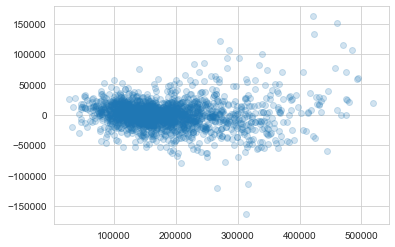

In [109]:
plt.scatter(y_pred, resids, alpha=0.2)

In [110]:
def write_score_to_file(X, y, filename, description):
    with open('scores.txt', 'a') as f:
        f.write('\n')
        f.write(str(time.ctime()) + ': ' + str(model.score(X, y)) + f' | Description: {description}')



In [111]:
write_score_to_file(X, y, 'scores.txt', "Added some of the top correlations")

## Test 1: 'Exter Qual' and '1st flr sf'

In [112]:
# houses_test['Exter Qual'] = houses_test['Exter Qual'].map(quality_map)

# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

# X_test = houses_test[fl1_under_3000_sf][['Exter Qual', '1st Flr SF']]

# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]

# submission.to_csv('./submissions/test1.csv', index=False)

In [113]:
# plt.scatter(X['Exter Qual'], y)
# plt.scatter(X['1st Flr SF'], y)

# Xnorm = X['Exter Qual']/norm(houses_train['Exter Qual'])

# Xnorm2 = X['1st Flr SF']/norm(X['1st Flr SF'])

# plt.scatter(Xnorm, y)
# plt.scatter(Xnorm2, y)

## Test 2: 'Exter Qual' 'Kitchen Qual' '1st flr sf'

In [114]:
# map_quality_to_discrete(houses_test, quality_cols_to_map)

# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

# X_test = houses_test[fl1_under_3000_sf][['Exter Qual', '1st Flr SF', 'Kitchen Qual']]

# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]

# submission.to_csv('./submissions/test3.csv', index=False)

## Test 5: Dummy vars + 1st and 2nd floor SF + Bath/Beds dummy + Streets + Lot Area

In [115]:
# category_to_bool_cols(houses_test, ordinal_categories)

In [116]:
# features = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA',
#             'Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA',
#             'Bsmt Cond_Gd', 'Bsmt Cond_TA',
#             'Heating_GasW', 'Heating_Grav',
#             '1st Flr SF', '2nd Flr SF', 'Lot Area',
#             'Street_Pave', 'Paved_Drive',
#            'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',
#             'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
#             'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
#             'Bedroom AbvGr_6']


In [117]:
# houses_test['has_2f'] = np.where(houses_test['2nd Flr SF'] > 0, 1, 0)
# houses_test['Paved_Drive'] = np.where(houses_test['Paved Drive'] == 'Y', 1, 0)

In [118]:


# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

In [119]:
# X_test = houses_test[fl1_under_3000_sf][features]

In [120]:
# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]
# submission[submission['SalePrice'] < 0]
# submission.describe()

In [121]:
# submission.to_csv('./submissions/test5.csv', index=False)

## Test 6: Adding Neighborhoods and overall quality/cond and Basement

In [122]:
category_to_bool_cols(houses_test, ordinal_categories)

In [123]:
# features = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA',
#             'Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA',
#             'Bsmt Cond_Gd', 'Bsmt Cond_TA',
#             'Heating_GasW', 'Heating_Grav',
#             '1st Flr SF', '2nd Flr SF',
#             'Lot Area', 'Paved_Drive',
#             'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',
#             'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
#             'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
#             'Bedroom AbvGr_6',
#             'Overall Cond', 'Overall Qual',
#            'Neighborhood_Blueste', 'Neighborhood_BrDale',
#        'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
#        'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
#        'Neighborhood_Greens', 'Neighborhood_IDOTRR',
#         'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
#        'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
#        'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
#        'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
#        'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
#        'Neighborhood_Veenker',
#            'has_central_air', 'Total Bsmt SF']



In [124]:
# houses_test['has_2f'] = np.where(houses_test['2nd Flr SF'] > 0, 1, 0)
# houses_test['Paved_Drive'] = np.where(houses_test['Paved Drive'] == 'Y', 1, 0)
# houses_test['has_central_air'] = np.where(houses_test['Central Air'] == 'Y', 1, 0)
# houses_test['Total Bsmt SF'].fillna(0, inplace=True)

In [125]:


# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

In [126]:
# X_test = houses_test[fl1_under_3000_sf][features]

In [127]:
# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]
# submission[submission['SalePrice'] < 0]
# submission.describe()

In [128]:
# submission.to_csv('./submissions/test6.csv', index=False)

## Test 7: Made more logs!

In [129]:
category_to_bool_cols(houses_test, ordinal_categories)

In [130]:
features_not_in_test = ['Garage Cars_2.0', 'Garage Cars_4.0', 'Garage Qual_Fa', 'Garage Cars_1.0', 'Garage Cars_3.0']
features = [feature for feature in features if feature not in features_not_in_test]

In [131]:
houses_test['has_central_air'] = np.where(houses_test['Central Air'] == 'Y', 1, 0)
houses_test['Total Bsmt SF'].fillna(0, inplace=True)
houses_test['Bsmt Unf SF'].fillna(0, inplace=True)

In [132]:
change_0_to_1 = lambda x: 1 if x <= 0 else x

In [133]:
def log_col(data, column):
    temp_df = data[column].apply(change_0_to_1).fillna(1)
    data[f"log_{column.replace(' ', '_').lower()}"] = np.log(temp_df)

In [134]:
log_col(houses_test, 'BsmtFin SF 1')
log_col(houses_test, '1st Flr SF')
log_col(houses_test, 'Lot Area')
log_col(houses_test, '2nd Flr SF')
log_col(houses_test, 'Total Bsmt SF')

In [135]:
houses_test['has_2f'] = np.where(houses_test['2nd Flr SF'] > 0, 1, 0)
houses_test['Paved_Drive'] = np.where(houses_test['Paved Drive'] == 'Y', 1, 0)
houses_test['has_central_air'] = np.where(houses_test['Central Air'] == 'Y', 1, 0)
houses_test['Total Bsmt SF'].fillna(0, inplace=True)

In [136]:
# need to refit the model because the amount of features might change X_test = houses_test[fl1_under_3000_sf][features]
X = fl1_under_3000_sf(houses_train, features)
y = fl1_under_3000_sf(houses_train, 'SalePrice')
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [137]:
X_test = fl1_under_3000_sf(houses_test, features)

In [138]:
houses_test['SalePrice'] = model.predict(X_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

Id      SalePrice
count   878.000000     878.000000
mean   1444.749431  178797.860441
std     850.838263   74980.494503
min       2.000000   15345.042024
25%     692.250000  129602.086021
50%    1433.000000  160876.036530
75%    2197.500000  213157.565099
max    2928.000000  595309.509124

In [139]:
submission.to_csv('./submissions/test7.csv', index=False)

## Past Experiments

In [ ]:
# fl1_under_3000_sf = houses_train['1st Flr SF'] < 3000

In [82]:
# houses_train['Exter Qual'] = houses_train['Exter Qual'].map(quality_map)

In [83]:
# X = houses_train[fl1_under_3000_sf][['Exter Qual', '1st Flr SF']]
# y = houses_train[fl1_under_3000_sf]['SalePrice']